<a href="https://colab.research.google.com/github/siree1708/devtern/blob/main/Uber_Trips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the necessary Python libraries and the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("uber-raw-data-aug14.csv")

In [4]:
data

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
658857,8/9/2014 0:14:00,40.7092,-73.9537,B02682
658858,8/9/2014 0:14:00,40.7429,-73.9806,B02682
658859,8/9/2014 0:14:00,40.7269,-73.9798,B02682
658860,8/9/2014 0:14:00,40.7258,-73.9926,B02682


In [5]:
data["Date/Time"]=data["Date/Time"].map(pd.to_datetime)
data

,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
658857,2014-08-09 00:14:00,40.7092,-73.9537,B02682
658858,2014-08-09 00:14:00,40.7429,-73.9806,B02682
658859,2014-08-09 00:14:00,40.7269,-73.9798,B02682
658860,2014-08-09 00:14:00,40.7258,-73.9926,B02682


# prepare the data according to days and hours

In [6]:
data["day"]=data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]=data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]=data["Date/Time"].apply(lambda x: x.hour)

In [7]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,1,4,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,1,4,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,1,4,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,1,4,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,1,4,0
...,...,...,...,...,...,...,...
658857,2014-08-09 00:14:00,40.7092,-73.9537,B02682,9,5,0
658858,2014-08-09 00:14:00,40.7429,-73.9806,B02682,9,5,0
658859,2014-08-09 00:14:00,40.7269,-73.9798,B02682,9,5,0
658860,2014-08-09 00:14:00,40.7258,-73.9926,B02682,9,5,0


# look at each day to see on which day the Uber trips were highest

<ipython-input-13-d29b96ca0324>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["day"])


<Axes: xlabel='day', ylabel='Density'>

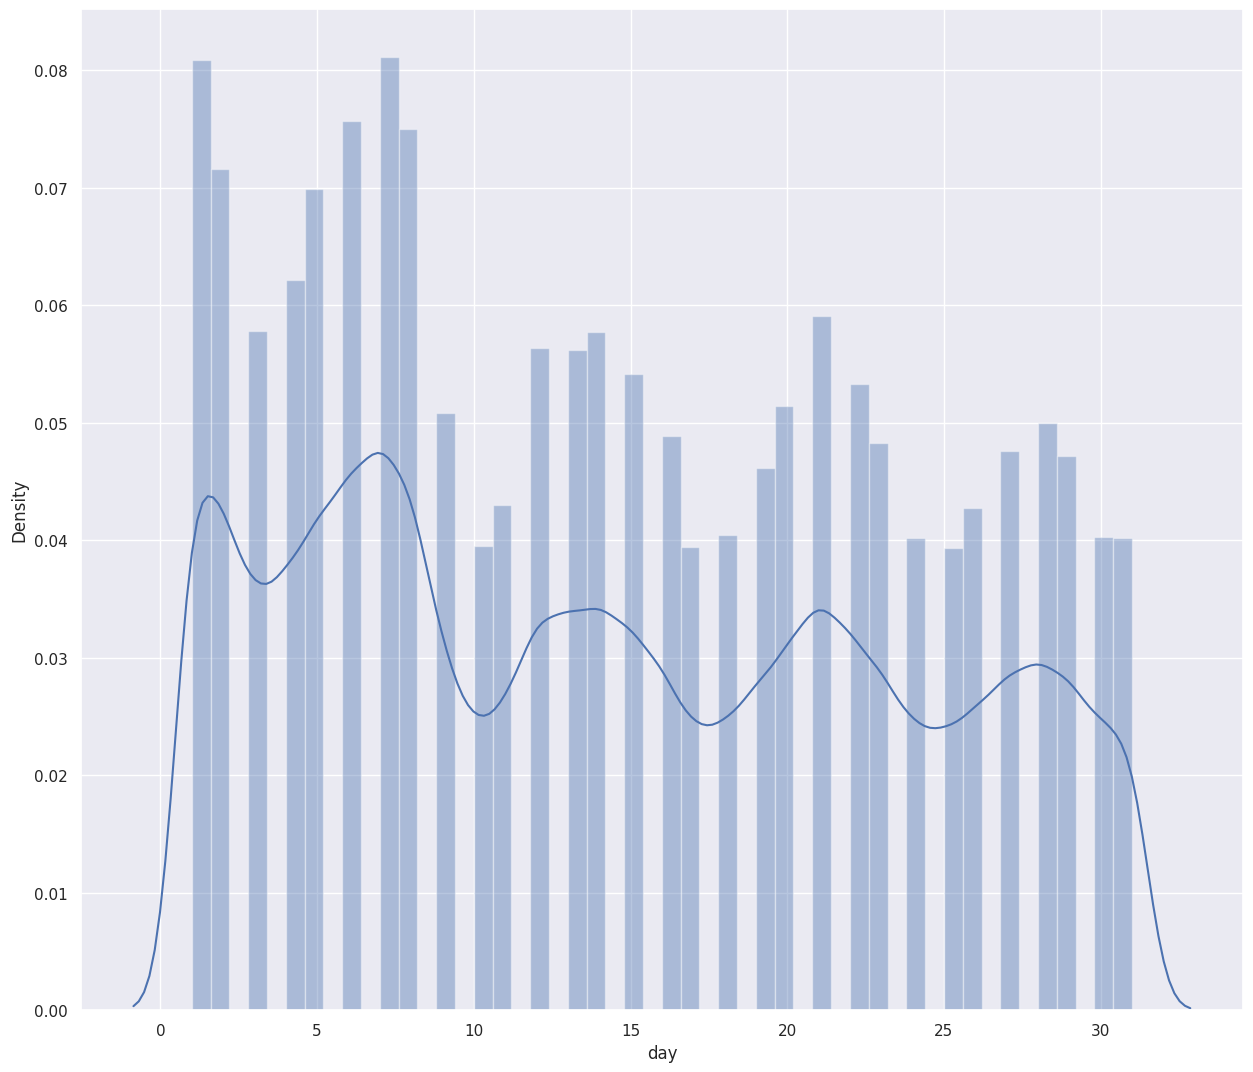

In [13]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(data["day"])


# analyse the Uber trips according to the hours

<ipython-input-9-87e9f10615aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["hour"])


<Axes: xlabel='hour', ylabel='Density'>

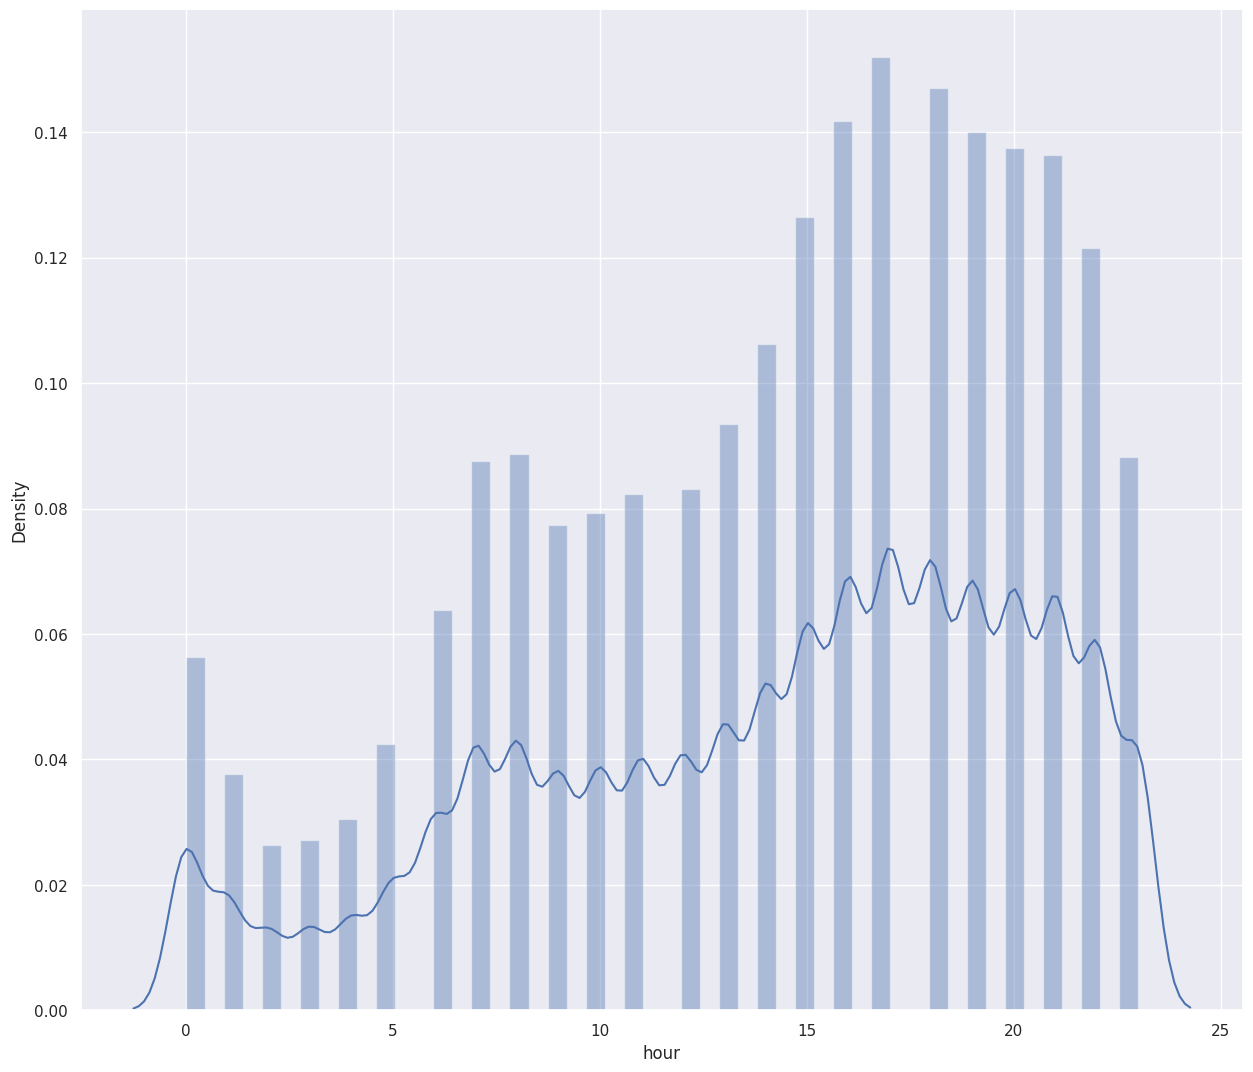

In [9]:
sns.distplot(data["hour"])

# analyse the Uber trips according to the weekdays

<ipython-input-10-25638e14af01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weekdays"])


<Axes: xlabel='weekdays', ylabel='Density'>

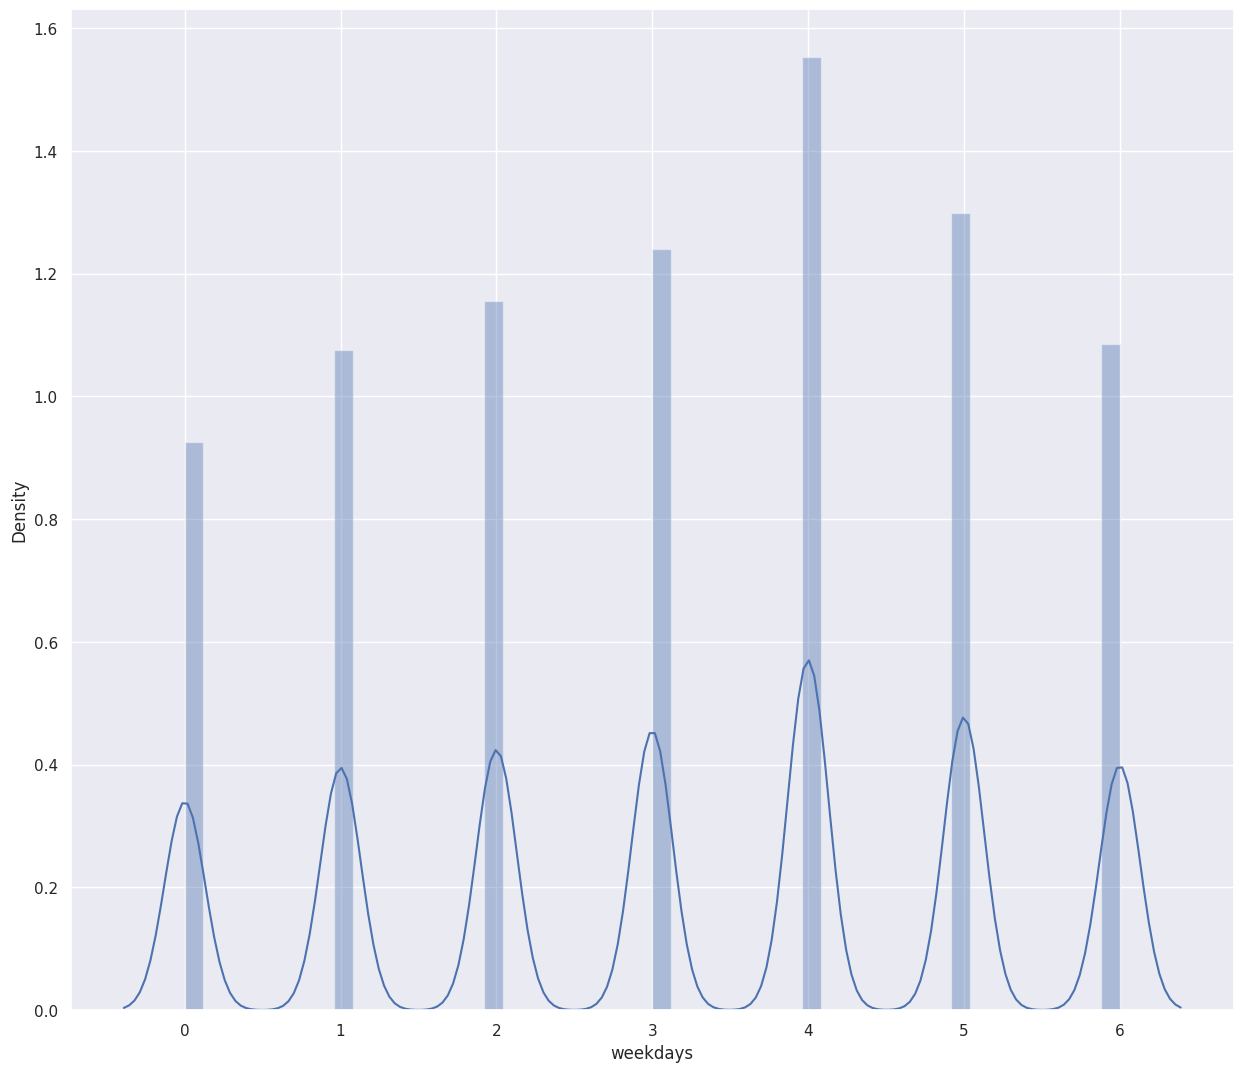

In [10]:
sns.distplot(data["weekdays"])

# look at the correlation of hours and weekdays

<Axes: xlabel='hour', ylabel='weekdays'>

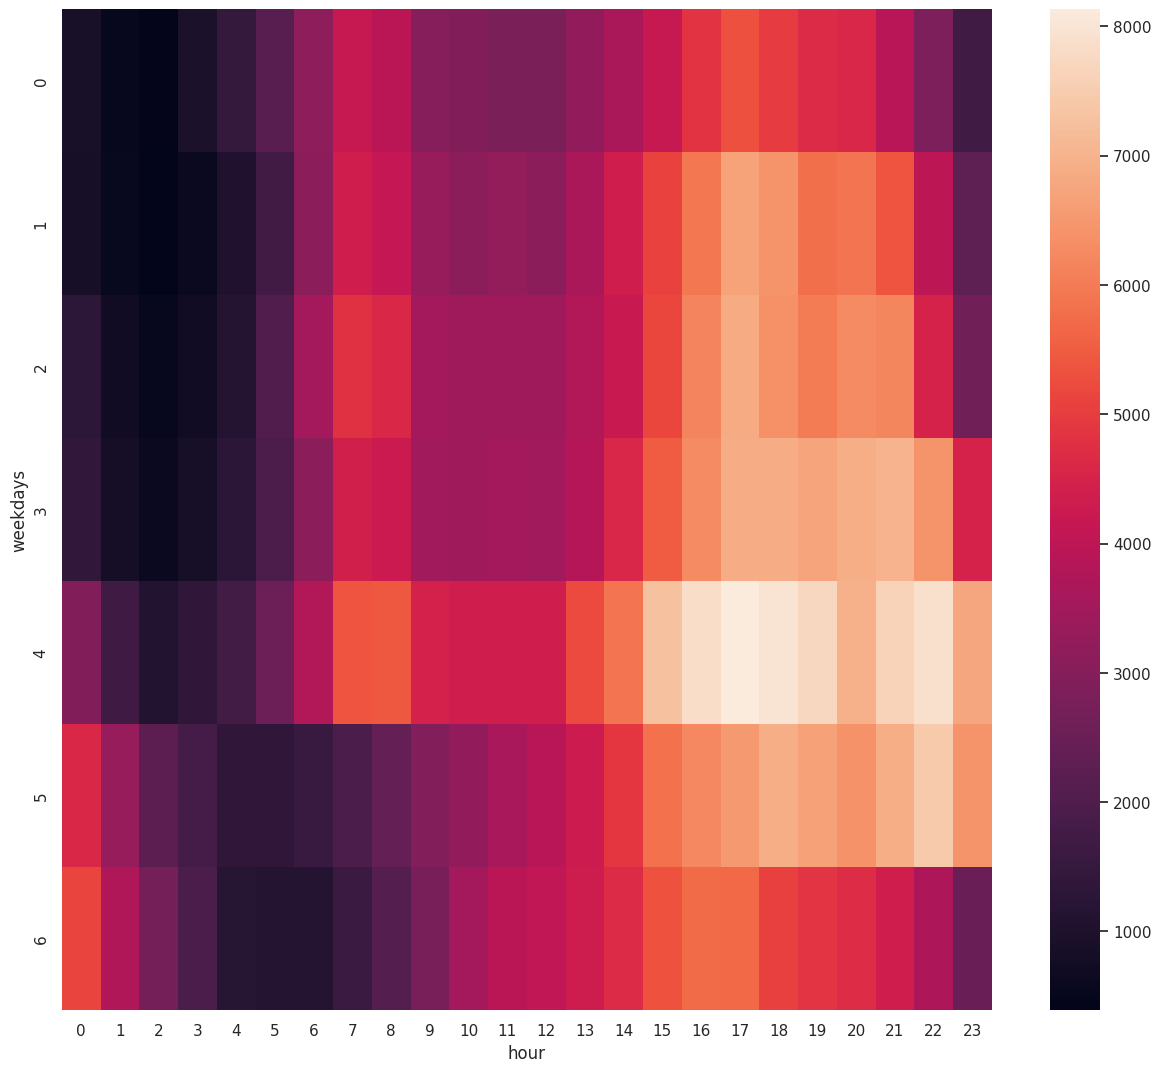

In [11]:
df=data.groupby(["weekdays","hour"]).apply(lambda x: len(x))
df=df.unstack()
sns.heatmap(df,annot=False)

# plot the density of Uber trips according to the regions of the New Your city

<Axes: xlabel='Lon', ylabel='Lat'>

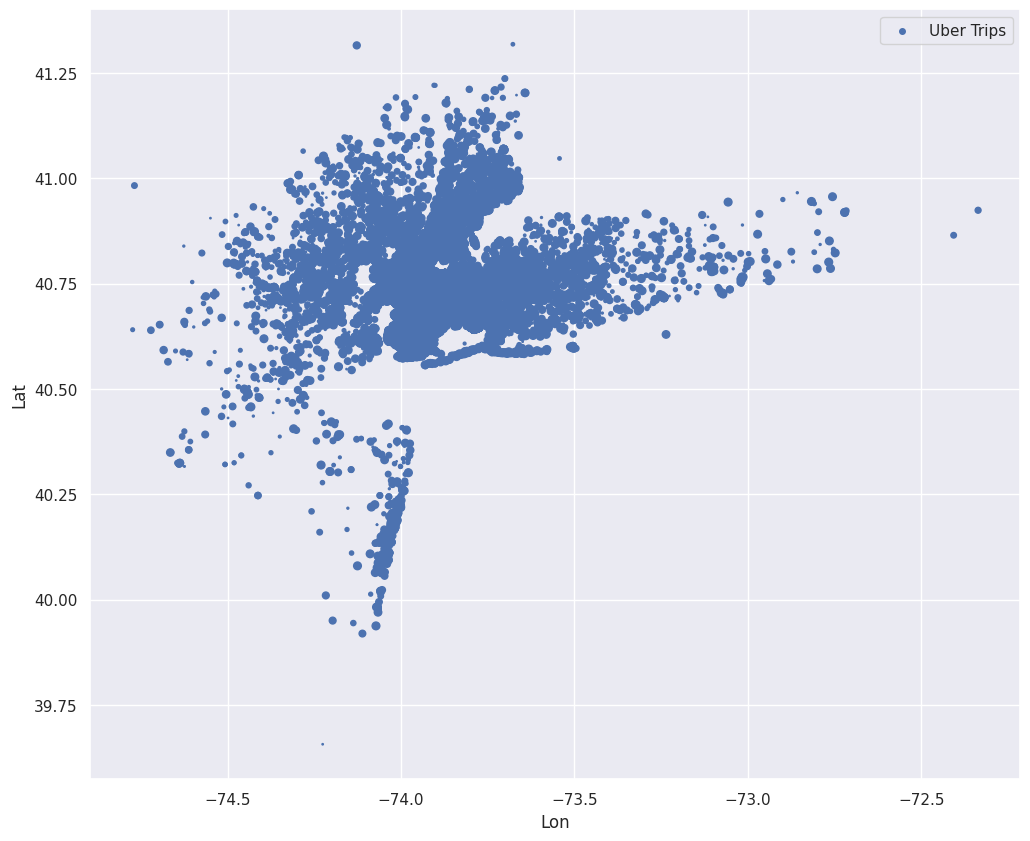

In [12]:
data.plot(kind='scatter',x='Lon', y='Lat', s=data['day'], label='Uber Trips', figsize=(12, 10))